## Linear Regression

You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

1.1.To read the data and do exploratory data analysis. Check the null values, Data types, shape, EDA. To perform Univariate and Bivariate Analysis.

1.2.To impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Do you think scaling is necessary in this case?

1.3.To encode the data (having string values) for Modelling. Data Split: Split the data into test and train (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using R square, RMSE.

1.4.To provide the Inference: Basis on these predictions, what are the business insights and recommendations.


In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math

## 1.1.To read the data and do exploratory data analysis. Check the null values, Data types, shape, EDA. To perform Univariate and Bivariate Analysis.

## EDA 

In [2]:
df = pd.read_csv("cubic_zirconia.csv")  

In [3]:
# Check top few records to get a feel of the data structure
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
# drop the Unnamed column as it is useless for the model
df = df.drop('Unnamed: 0', axis=1)

In [5]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [6]:
df.shape

(26967, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [8]:
#df = pd.get_dummies(df, columns=['cut','color','clarity'],drop_first=True)

In [9]:
#df.info()

In [10]:
df.describe()

,carat,depth,table,x,y,z,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


##### Unique values for categorical variables

In [11]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64




We have 5 different types of Cuts. “Ideal”  type of cut is most popular cut with 10816 counts. Color has 7 types with “Color G” being most popular with 5661 numbers. Clarity has 8 different types with SI1 being the most popular with 6571 numbers.

In [12]:
isna = df.isna().sum().sum()
print("{} Missing values are present".format(isna)) if isna == 0  else print("{} Missing values is present".format(isna))

697 Missing values is present


In [13]:
dup = df.duplicated().sum()
print("{} duplicate values is present".format(dup)) if dup == 0  else print("{} duplicate values is present".format(dup))

34 duplicate values is present


In [14]:
df.drop_duplicates(inplace=True)

In [15]:
dup = df.duplicated().sum()
print("{} duplicate values is present".format(dup)) if dup == 0  else print("{} duplicate values is present".format(dup))

0 duplicate values is present


In [16]:
df.isnull().sum()/df.isnull().sum().sum()*100

carat        0.0
cut          0.0
color        0.0
clarity      0.0
depth      100.0
table        0.0
x            0.0
y            0.0
z            0.0
price        0.0
dtype: float64

“depth” variable contributes for 100% of missing values we can seen in above table.

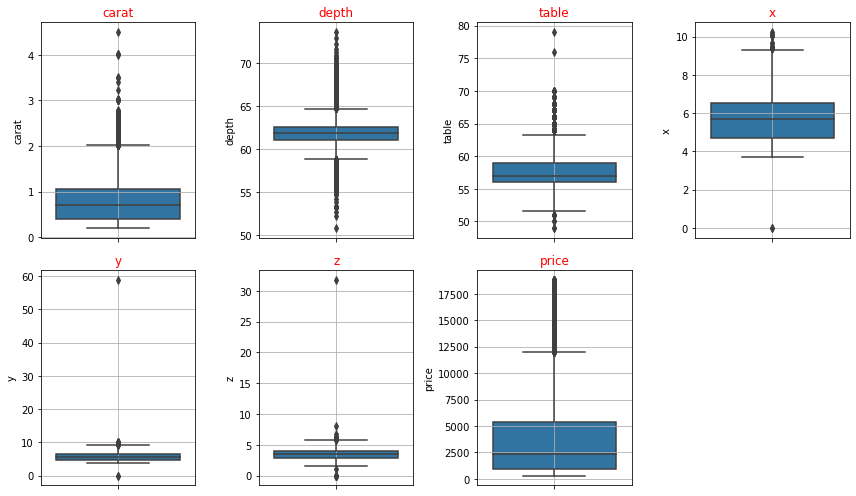

In [17]:
cont=df.dtypes[(df.dtypes=='int64')|(df.dtypes=='float64')].index
data_plot=df[cont]
fig=plt.figure(figsize=(12,7))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(2,4,i+1)
    sns.boxplot(y=data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Red')
    plt.grid()
plt.tight_layout()

#### Univariate Analysis:
Distribution of Continuous Variables:


In [18]:
plt.figure(figsize = (30,40))
feature = df.columns[:-17]
for i in enumerate(feature):
    plt.subplot(6,3, i[0]+1)
    sns.distplot(df[i[1]])

<Figure size 2160x2880 with 0 Axes>

#### Bivariate Analysis

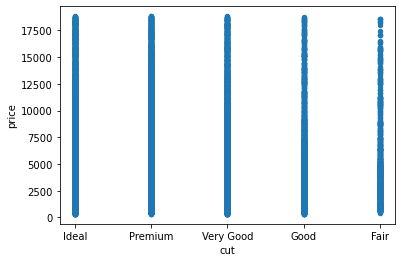

In [19]:
df.plot(x='cut', y='price', kind='scatter')
plt.show()

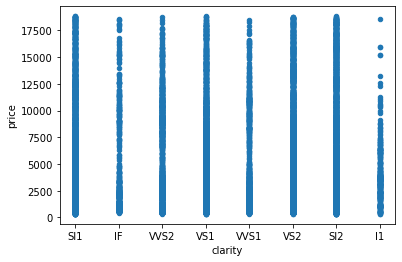

In [20]:
df.plot(x='clarity', y='price', kind='scatter')
plt.show()

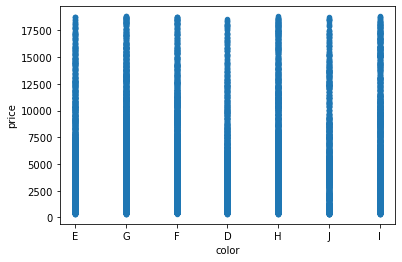

In [21]:
df.plot(x='color', y='price', kind='scatter')
plt.show()

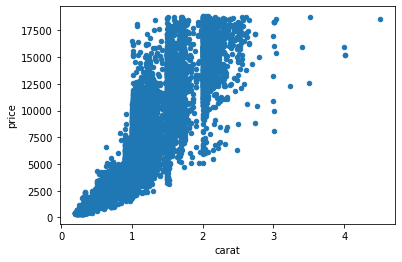

In [22]:
df.plot(x='carat', y='price', kind='scatter')
plt.show()

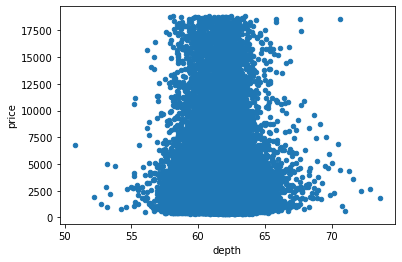

In [23]:
df.plot(x='depth', y='price', kind='scatter')
plt.show()

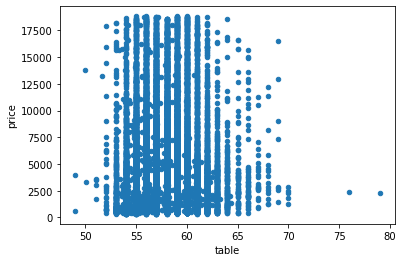

In [24]:
df.plot(x='table', y='price', kind='scatter')
plt.show()

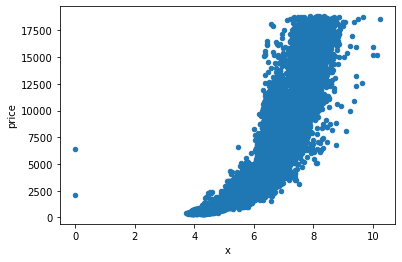

In [25]:
df.plot(x='x', y='price', kind='scatter')
plt.show()

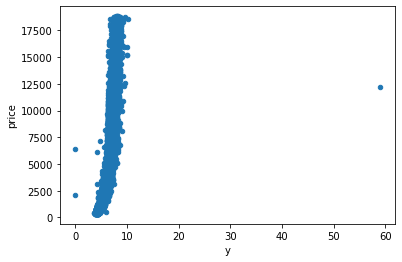

In [26]:
df.plot(x='y', y='price', kind='scatter')
plt.show()

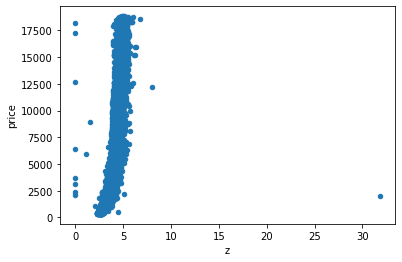

In [27]:
df.plot(x='z', y='price', kind='scatter')
plt.show()

#### Multivariate Analysis

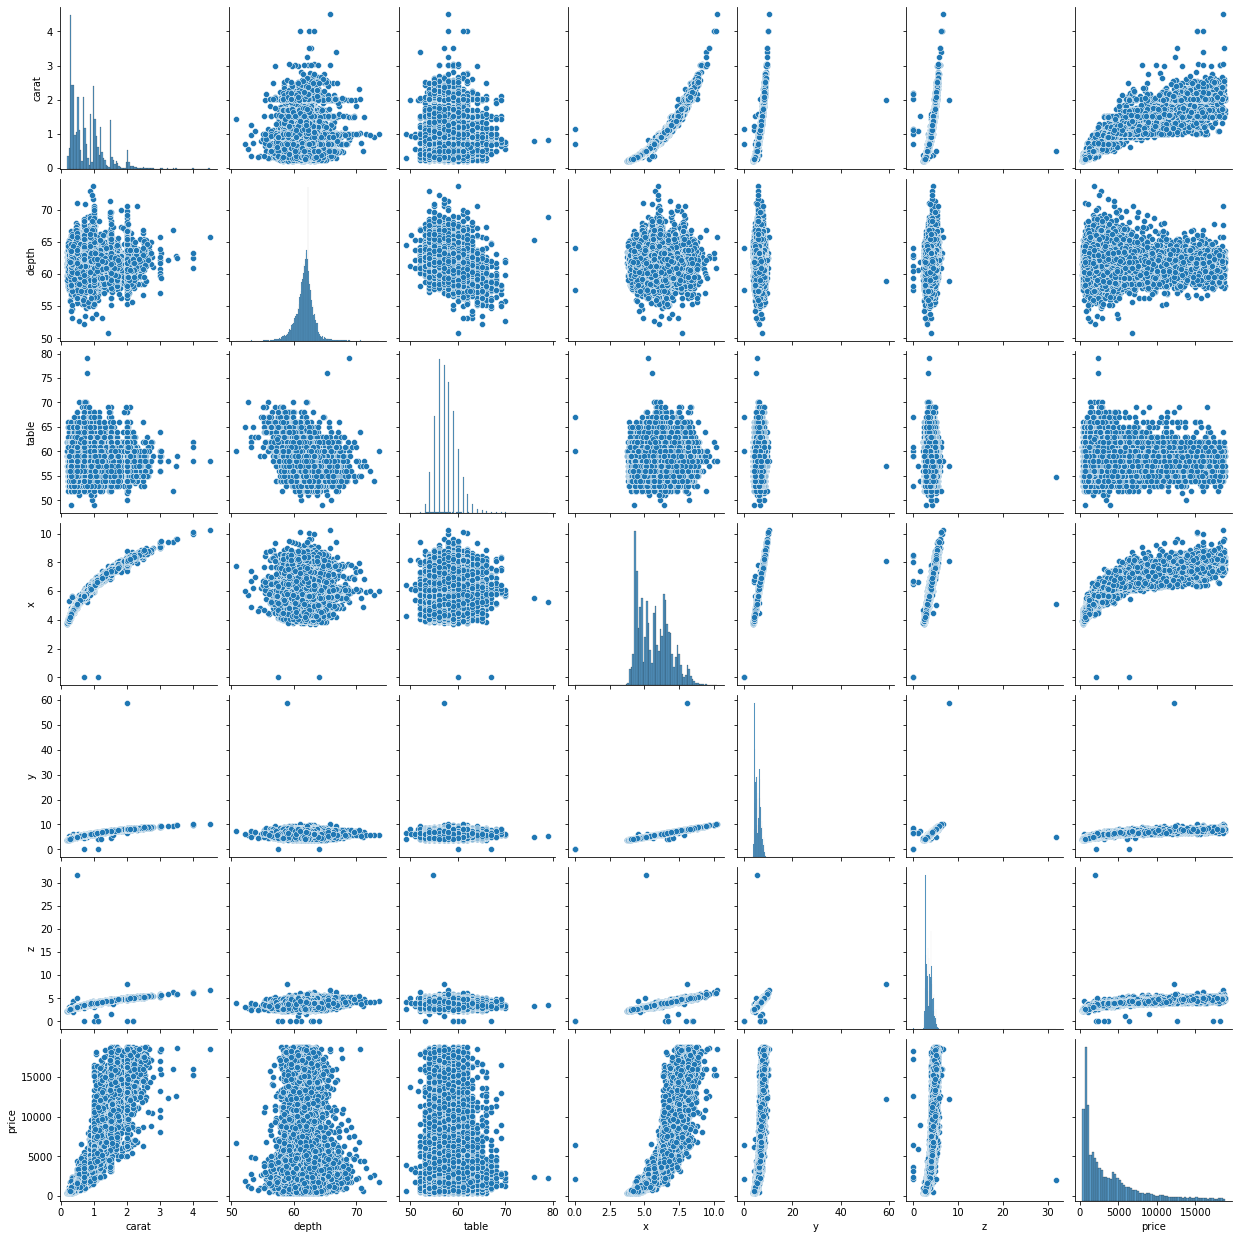

In [28]:
#sns.pairplot(data=df);
sns.pairplot(df[df.dtypes[(df.dtypes=='int64')|(df.dtypes=='float64')].index])
plt.show()

In [29]:
df.corr(method='pearson').round(2)

,carat,depth,table,x,y,z,price
carat,1.00,0.04,0.18,0.98,0.94,0.94,0.92
depth,0.04,1.00,-0.30,-0.02,-0.02,0.10,-0.00
table,0.18,-0.30,1.00,0.20,0.18,0.15,0.13
x,0.98,-0.02,0.20,1.00,0.96,0.96,0.89
y,0.94,-0.02,0.18,0.96,1.00,0.93,0.86
z,0.94,0.10,0.15,0.96,0.93,1.00,0.85
price,0.92,-0.00,0.13,0.89,0.86,0.85,1.00


In [30]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


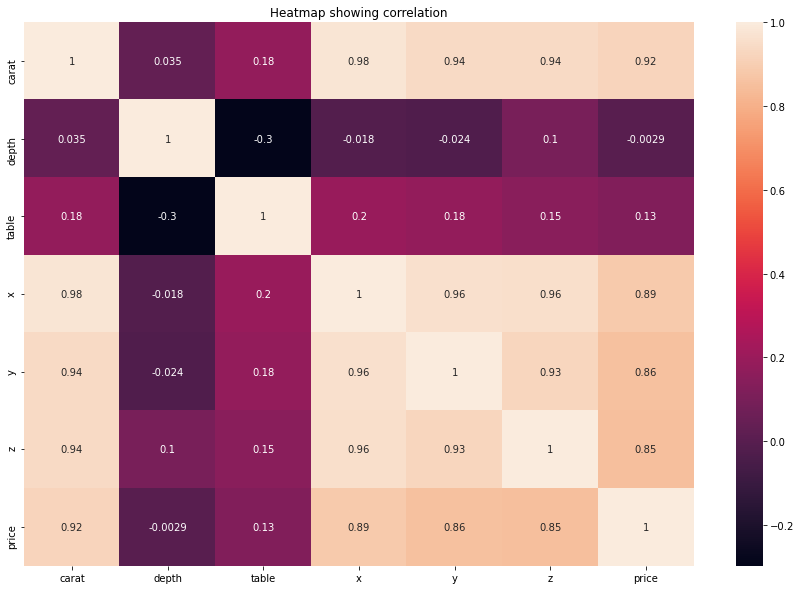

In [31]:
plt.figure(figsize=(15,10));
sns.heatmap(df.iloc[:, 0:10].corr(),annot=True)
plt.title('Heatmap showing correlation');
plt.show()


In [32]:
#plt.figure(figsize=(15,10));
#sns.heatmap(df.corr().round(2), annot=True, vmin=-1, vmax=1, cmap='coolwarm', lw=2);
#plt.title('Heatmap showing correlation');

From above Heat map we can see that many variables have good correlation and some variables have no correlation and some have negative correlation.
E.g. 
•	Carat and X have correlation value of 0.98, which is very Strong Correlation. 
•	Y and X have correlation value of 0.96, which is very Strong Correlation. 
•	Price and Depth have no correlation.
•	Depth and Table have negative correlation with a value of -0.30.
•	Depth and Table have very poor correlations with almost all the variables.

## 1.2. Impute null values if present, also check for the values which are equal to zero. Do they have any meaning, or do we need to change them or drop them? Do you think scaling is necessary in this case?

### Imputation

As seen previously there are 697 Null Values in the variable “depth”.
We will impute the missing values with median, as median is unaffected by presence of outliers.

In [33]:
df['depth'] = df['depth'].fillna(df.depth.median())

In [34]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

### Identify the columns having 0 as the value

In [35]:
for column in df.columns:
    if df[column].dtype == 'float64' :
        print(column.upper(),': ')
        print('Total number of values: ', df[column].count())
        print('Total number of non null values: ', np.count_nonzero(df[column]))
        print()

CARAT : 
Total number of values:  26933
Total number of non null values:  26933

DEPTH : 
Total number of values:  26933
Total number of non null values:  26933

TABLE : 
Total number of values:  26933
Total number of non null values:  26933

X : 
Total number of values:  26933
Total number of non null values:  26931

Y : 
Total number of values:  26933
Total number of non null values:  26931

Z : 
Total number of values:  26933
Total number of non null values:  26925



We have 26933. Variables Carat, Depth and Table have 26933 non zero observations. But the non-null values in variable X & Y are 26931. Which means there are 2 observations having value as 0 in both the vairables. Also, there are 26925 non-null values, which means there are 8 observations having value as 0.

### Scaling

Scaling is necessary in this case. Because when we see the data set, there are some variables which are ranging from 0 to 5, but there are also some variables which are ranging from 0 to nearly 18000. When we build model there would be more importance given to the variables having higher magnitude. So, these more significant number starts playing a more decisive role while training the model. Which may lead to inaccurate results. And it will lead to under fitting or over fitting of the models. Hence, we scale the data in order to get them to same scale.
Also, feature scaling is an important pre-processing step for many machine learning algorithms. And scaling will be done after treating outliers in the below section.


### Treating Outliers

In [36]:
# Complete the function to calculate lower_range and upper_range
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [37]:
for feature in df[['carat', 'depth', 'table', 'x', 'y','z','price']]: 
    lr,ur=treat_outlier(df[feature])
    df[feature]=np.where(df[feature]>ur,ur,df[feature])
    df[feature]=np.where(df[feature]<lr,lr,df[feature])

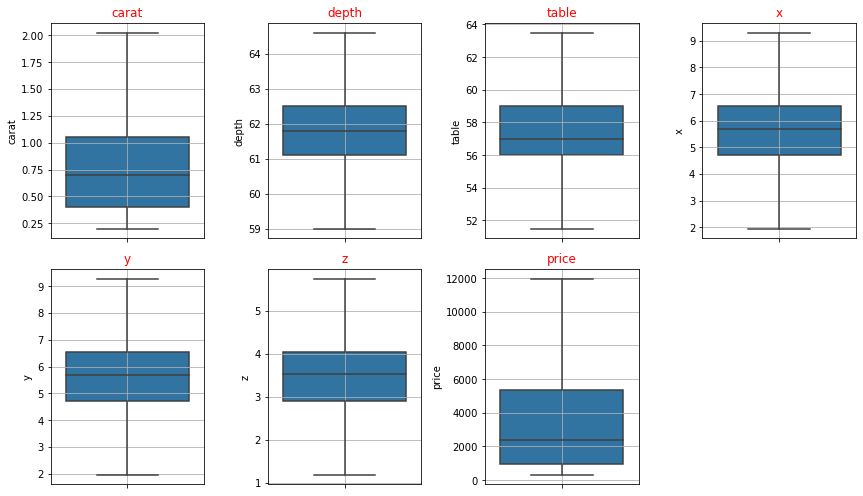

In [38]:
cont=df.dtypes[(df.dtypes=='int64')|(df.dtypes=='float64')].index
data_plot=df[cont]
fig=plt.figure(figsize=(12,7))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(2,4,i+1)
    sns.boxplot(y=data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Red')
    plt.grid()
plt.tight_layout()

Outlier Treatment:  As we have seen before that there are quite a large number of outlier’s present, we need to treat them. Linear Regression models are affected by presence of outliers.

### Check the non-zero value after treating outliers

In [39]:
for column in df.columns:
    if df[column].dtype == 'float64' :
        print(column.upper(),': ')
        print('Total number of values: ', df[column].count())
        print('Total number of non null values: ', np.count_nonzero(df[column]))
        print()

CARAT : 
Total number of values:  26933
Total number of non null values:  26933

DEPTH : 
Total number of values:  26933
Total number of non null values:  26933

TABLE : 
Total number of values:  26933
Total number of non null values:  26933

X : 
Total number of values:  26933
Total number of non null values:  26933

Y : 
Total number of values:  26933
Total number of non null values:  26933

Z : 
Total number of values:  26933
Total number of non null values:  26933

PRICE : 
Total number of values:  26933
Total number of non null values:  26933



We have 26933 observations and after outiers treatment we can see that all the variables have 26933 non null values. 

### Performing scaling
As of now we will scale  continuous variables only , becasue we haven't converted categorical variables into continuous variables yet

In [40]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler()

In [41]:
StandardScaler(copy=True, with_mean=True,with_std=True)

StandardScaler()

In [42]:
df_std =std_scale.fit_transform(df[cont])

In [43]:
df_std_1 =pd.DataFrame(data=df_std,columns=cont)
df_std_1.head()

,carat,depth,table,x,y,z,price
0,-1.067471,0.286857,0.261676,-1.295847,-1.288982,-1.258616,-0.933304
1,-1.002552,-0.780022,0.261676,-1.162650,-1.136943,-1.201206,-0.793460
2,0.230898,0.368925,1.188856,0.275874,0.347673,0.348871,0.736177
3,-0.807797,-0.123481,-0.665503,-0.807459,-0.832865,-0.828039,-0.765203
4,-1.045831,-1.108292,0.725266,-1.224808,-1.163774,-1.272969,-0.852569


## 1.3 Encode the data (having string values) for Modelling. Data Split: Split the data into test and train (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using Rsquare, RMSE.

#### Let's encode the data for Categorical variable

In [44]:
# Converting categorical variables into dummy variables
df = pd.get_dummies(df, columns=['cut','color','clarity'],drop_first=True)

In [46]:
df.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,499.0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984.0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,1082.0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,779.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [47]:
#Encode the entire dataset for the model
from scipy.stats import zscore
df = df.apply(zscore)
df.head(5)

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.067471,0.286857,0.261676,-1.295847,-1.288982,-1.258616,-0.933304,-0.315271,1.221737,-0.586083,...,-0.423446,-0.338242,-0.237668,-0.184970,1.761395,-0.451699,-0.422958,-0.540713,-0.270711,-0.321987
1,-1.002552,-0.780022,0.261676,-1.162650,-1.136943,-1.201206,-0.793460,-0.315271,-0.818506,1.706244,...,-0.423446,-0.338242,-0.237668,5.406277,-0.567732,-0.451699,-0.422958,-0.540713,-0.270711,-0.321987
2,0.230898,0.368925,1.188856,0.275874,0.347673,0.348871,0.736177,-0.315271,-0.818506,-0.586083,...,-0.423446,-0.338242,-0.237668,-0.184970,-0.567732,-0.451699,-0.422958,-0.540713,-0.270711,3.105713
3,-0.807797,-0.123481,-0.665503,-0.807459,-0.832865,-0.828039,-0.765203,-0.315271,1.221737,-0.586083,...,-0.423446,-0.338242,-0.237668,-0.184970,-0.567732,-0.451699,2.364301,-0.540713,-0.270711,-0.321987
4,-1.045831,-1.108292,0.725266,-1.224808,-1.163774,-1.272969,-0.852569,-0.315271,1.221737,-0.586083,...,-0.423446,-0.338242,-0.237668,-0.184970,-0.567732,-0.451699,-0.422958,-0.540713,3.693976,-0.321987


### Splitting the dataset into Train and Test Data (70:30)

In [48]:
# predictor variable into X dataframe
X=df.drop('price',axis=1)

# Copy target into the y dataframe. 
y = df[['price']]

In [49]:
X.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.067471,0.286857,0.261676,-1.295847,-1.288982,-1.258616,-0.315271,1.221737,-0.586083,-0.536927,...,-0.423446,-0.338242,-0.237668,-0.184970,1.761395,-0.451699,-0.422958,-0.540713,-0.270711,-0.321987
1,-1.002552,-0.780022,0.261676,-1.162650,-1.136943,-1.201206,-0.315271,-0.818506,1.706244,-0.536927,...,-0.423446,-0.338242,-0.237668,5.406277,-0.567732,-0.451699,-0.422958,-0.540713,-0.270711,-0.321987
2,0.230898,0.368925,1.188856,0.275874,0.347673,0.348871,-0.315271,-0.818506,-0.586083,1.862451,...,-0.423446,-0.338242,-0.237668,-0.184970,-0.567732,-0.451699,-0.422958,-0.540713,-0.270711,3.105713
3,-0.807797,-0.123481,-0.665503,-0.807459,-0.832865,-0.828039,-0.315271,1.221737,-0.586083,-0.536927,...,-0.423446,-0.338242,-0.237668,-0.184970,-0.567732,-0.451699,2.364301,-0.540713,-0.270711,-0.321987
4,-1.045831,-1.108292,0.725266,-1.224808,-1.163774,-1.272969,-0.315271,1.221737,-0.586083,-0.536927,...,-0.423446,-0.338242,-0.237668,-0.184970,-0.567732,-0.451699,-0.422958,-0.540713,3.693976,-0.321987


In [50]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [51]:
print('Shape of X_train', X_train.shape)
print('Shape of X_test', X_test.shape)
print('Shape of y_train', y_train.shape)
print('Shape of y_test', X_test.shape)

Shape of X_train (18853, 23)
Shape of X_test (8080, 23)
Shape of y_train (18853, 1)
Shape of y_test (8080, 23)


### Linear Regression Model without scaling

In [52]:
# invoke the LinearRegression function and find the bestfit model on training data
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [53]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.2161199848933162
The coefficient for depth is -0.00524945788679231
The coefficient for table is -0.011554491519215795
The coefficient for x is -0.3864661127837534
The coefficient for y is 0.2700495128662611
The coefficient for z is -0.032980564161219666
The coefficient for cut_Good is 0.039839061690720184
The coefficient for cut_Ideal is 0.10100540799510332
The coefficient for cut_Premium is 0.08488253609270154
The coefficient for cut_Very Good is 0.07293599919692752
The coefficient for color_E is -0.020260318841904906
The coefficient for color_F is -0.028158796452670023
The coefficient for color_G is -0.05041837437938434
The coefficient for color_H is -0.08862231953540377
The coefficient for color_I is -0.11586427155956054
The coefficient for color_J is -0.12506260840794214
The coefficient for clarity_IF is 0.2064859563041433
The coefficient for clarity_SI1 is 0.31195790843890514
The coefficient for clarity_SI2 is 0.18221135399044033
The coefficient for 

In [54]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 0.000980345969491822


### R square and RMSE on train & test Dataset

In [78]:
# R square on training data
regression_model.score(X_train, y_train)

0.9402044588687953

In [56]:
# R square on testing data
regression_model.score(X_test, y_test)

0.9419074345242372

In [57]:
#RMSE on Training data
from sklearn import metrics
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.24435440092961688

In [58]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.2414302482986024

### Linear Regression Using STATS Model 

In [59]:
import statsmodels.formula.api as smf

data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
22114,-0.980913,0.533060,1.188856,-1.171530,-1.154830,-1.115091,-0.315271,-0.818506,-0.586083,1.862451,...,-0.338242,-0.237668,-0.18497,-0.567732,-0.451699,-0.422958,1.849410,-0.270711,-0.321987,-0.922347
2275,-1.067471,-0.451751,-1.129093,-1.224808,-1.271095,-1.272969,-0.315271,1.221737,-0.586083,-0.536927,...,-0.338242,-0.237668,-0.18497,-0.567732,-0.451699,-0.422958,1.849410,-0.270711,-0.321987,-0.833827
19183,-0.634681,0.615128,-0.201914,-0.567705,-0.609279,-0.526636,-0.315271,1.221737,-0.586083,-0.536927,...,-0.338242,-0.237668,-0.18497,1.761395,-0.451699,-0.422958,-0.540713,-0.270711,-0.321987,-0.719645
5030,0.663688,1.271669,-0.665503,0.710983,0.759072,0.879916,3.171873,-0.818506,-0.586083,-0.536927,...,-0.338242,-0.237668,-0.18497,-0.567732,2.213862,-0.422958,-0.540713,-0.270711,-0.321987,0.094912
25414,0.490572,-0.533819,2.116035,0.719863,0.678581,0.635922,-0.315271,-0.818506,1.706244,-0.536927,...,-0.338242,-0.237668,-0.18497,-0.567732,2.213862,-0.422958,-0.540713,-0.270711,-0.321987,0.092605


In [60]:
#df.to_csv('data_train.csv')

In [61]:
data_train.rename(columns = {"cut_Very Good": "cut_Very_Good"}, 
                      inplace = True) 

data_test.rename(columns = {"cut_Very Good": "cut_Very_Good"}, 
                      inplace = True)

In [62]:
data_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very_Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'price'],
      dtype='object')

In [63]:
expr = 'price ~ carat + depth+ table + x + y + z+ cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_E+ color_F+ color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2'

In [64]:
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept        0.000980
carat            1.216120
depth           -0.005249
table           -0.011554
x               -0.386466
y                0.270050
z               -0.032981
cut_Good         0.039839
cut_Ideal        0.101005
cut_Premium      0.084883
cut_Very_Good    0.072936
color_E         -0.020260
color_F         -0.028159
color_G         -0.050418
color_H         -0.088622
color_I         -0.115864
color_J         -0.125063
clarity_IF       0.206486
clarity_SI1      0.311958
clarity_SI2      0.182211
clarity_VS1      0.345786
clarity_VS2      0.366730
clarity_VVS1     0.274347
clarity_VVS2     0.316105
dtype: float64

The coefficients and intercept of both the models are  same.

In [65]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                 1.287e+04
Date:                Wed, 13 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:04:13   Log-Likelihood:                -184.81
No. Observations:               18853   AIC:                             417.6
Df Residuals:                   18829   BIC:                             605.9
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0010      0.002      0.550

### PERFORMANCE METRICS OF STATS MODEL

In [66]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [67]:
np.sqrt(mse)

0.244354400929617

In [68]:
np.sqrt(lm1.mse_resid) #another way

0.24451008200785523

In [69]:
# Prediction on Test data
y_predtest = lm1.predict(data_test)

In [70]:
y_predtrain = lm1.predict(data_train)

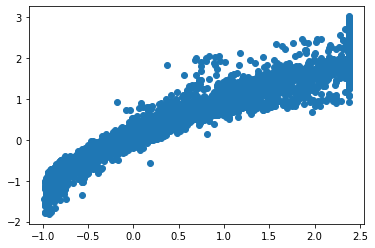

In [71]:
plt.scatter(y_test['price'], y_predtest)
plt.show()

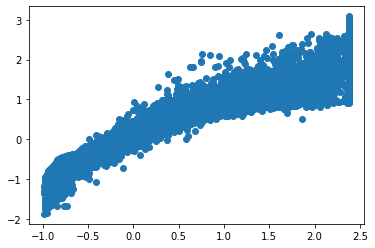

In [72]:
plt.scatter(y_train['price'], y_predtrain)
plt.show()

In [73]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(0.0) * Intercept + (1.22) * carat + (-0.01) * depth + (-0.01) * table + (-0.39) * x + (0.27) * y + (-0.03) * z + (0.04) * cut_Good + (0.1) * cut_Ideal + (0.08) * cut_Premium + (0.07) * cut_Very_Good + (-0.02) * color_E + (-0.03) * color_F + (-0.05) * color_G + (-0.09) * color_H + (-0.12) * color_I + (-0.13) * color_J + (0.21) * clarity_IF + (0.31) * clarity_SI1 + (0.18) * clarity_SI2 + (0.35) * clarity_VS1 + (0.37) * clarity_VS2 + (0.27) * clarity_VVS1 + (0.32) * clarity_VVS2 + 

### Variation Inflation Factor(VIF) Values

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X.values,ix) for ix in range(X.shape[1])]
i=0
for column in X.columns:
    if i < 24:
        print(column,"----->", vif[i])
        i = i+1

carat -----> 32.13838997999503
depth -----> 2.8480986062329063
table -----> 1.805206724315004
x -----> 443.15680034968045
y -----> 436.35380432823297
z -----> 105.90156134182482
cut_Good -----> 4.052410007467492
cut_Ideal -----> 11.275998523090374
cut_Premium -----> 8.242385965846319
cut_Very Good -----> 7.849180128721915
color_E -----> 2.029010563643415
color_F -----> 2.019141551216222
color_G -----> 2.2090372653116273
color_H -----> 1.954889969597121
color_I -----> 1.732890130443254
color_J -----> 1.4332806341041933
clarity_IF -----> 3.5499807967360417
clarity_SI1 -----> 14.891713207537055
clarity_SI2 -----> 11.490918302251094
clarity_VS1 -----> 10.837364265137467
clarity_VS2 -----> 14.293049291035969
clarity_VVS1 -----> 6.015178962037065
clarity_VVS2 -----> 7.611723612976851
